In [1]:
#Import packages needed for analysis and model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
#Read data csv file into pandas dataframe

In [4]:
db = pd.read_csv('diabetes.csv')

In [5]:
db.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    bool   
dtypes: bool(1), float64(2), int64(6)
memory usage: 48.9 KB


In [7]:
db.isnull().sum()

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64

In [8]:
#no null values in the data
#all data is numeric except the target value of outcome (True or False is diabetic)

In [9]:
db.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [10]:
#there are 0 values where 0 does not make sense, e.g. BMI, BP, etc. 
#Whereas 0 for pregnancies would be a valid response

In [11]:
#make a copy of the dataframe

In [12]:
db_copy = db.copy(deep=True)


In [13]:
#select columns where 0 would not be a valid response and replace 0 with NaN to get true
#sense of null values

In [14]:
db_copy[['glucose',
  'bloodpressure','skinthickness','insulin','bmi']] = db_copy[['glucose',
  'bloodpressure','skinthickness','insulin','bmi']].replace(0,np.NaN)

In [15]:
db_copy.isnull().sum()

pregnancies                   0
glucose                       5
bloodpressure                35
skinthickness               227
insulin                     374
bmi                          11
diabetespedigreefunction      0
age                           0
outcome                       0
dtype: int64

array([[<AxesSubplot:title={'center':'pregnancies'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'bloodpressure'}>],
       [<AxesSubplot:title={'center':'skinthickness'}>,
        <AxesSubplot:title={'center':'insulin'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'diabetespedigreefunction'}>,
        <AxesSubplot:title={'center':'age'}>, <AxesSubplot:>]],
      dtype=object)

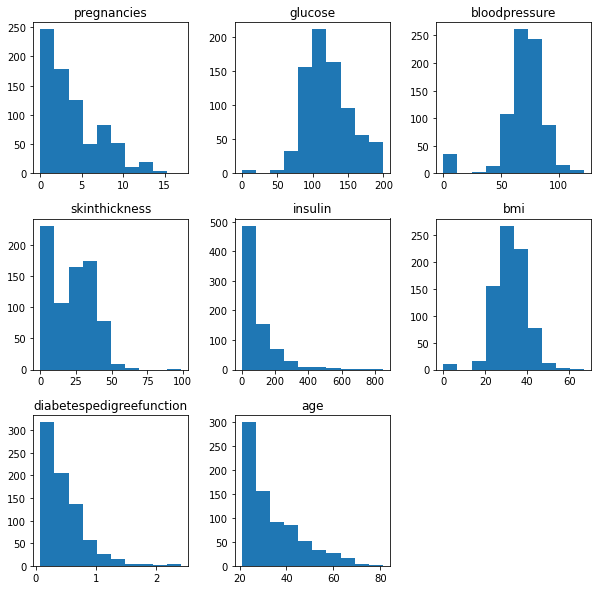

In [16]:
db.hist(figsize=(10,10), grid = False)

In [17]:
#use fillna() to replace NaN with median value in each column

In [18]:
db_copy = db_copy.fillna(db_copy.median())

array([[<AxesSubplot:title={'center':'pregnancies'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'bloodpressure'}>],
       [<AxesSubplot:title={'center':'skinthickness'}>,
        <AxesSubplot:title={'center':'insulin'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'diabetespedigreefunction'}>,
        <AxesSubplot:title={'center':'age'}>, <AxesSubplot:>]],
      dtype=object)

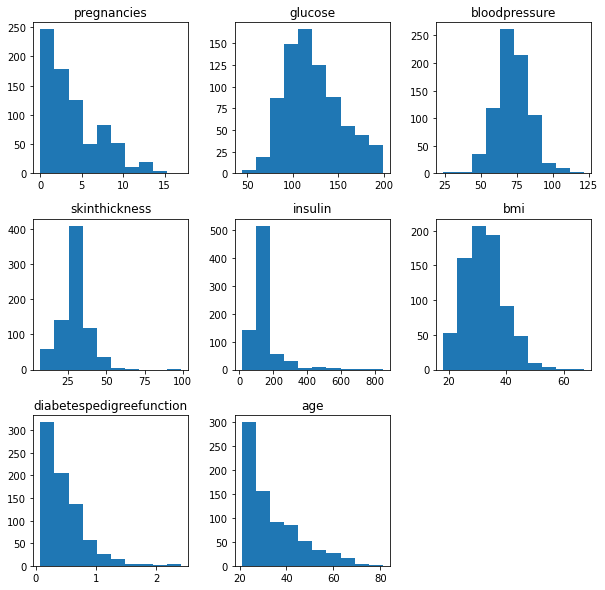

In [19]:
db_copy.hist(figsize=(10,10), grid = False)

In [20]:
db_copy.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


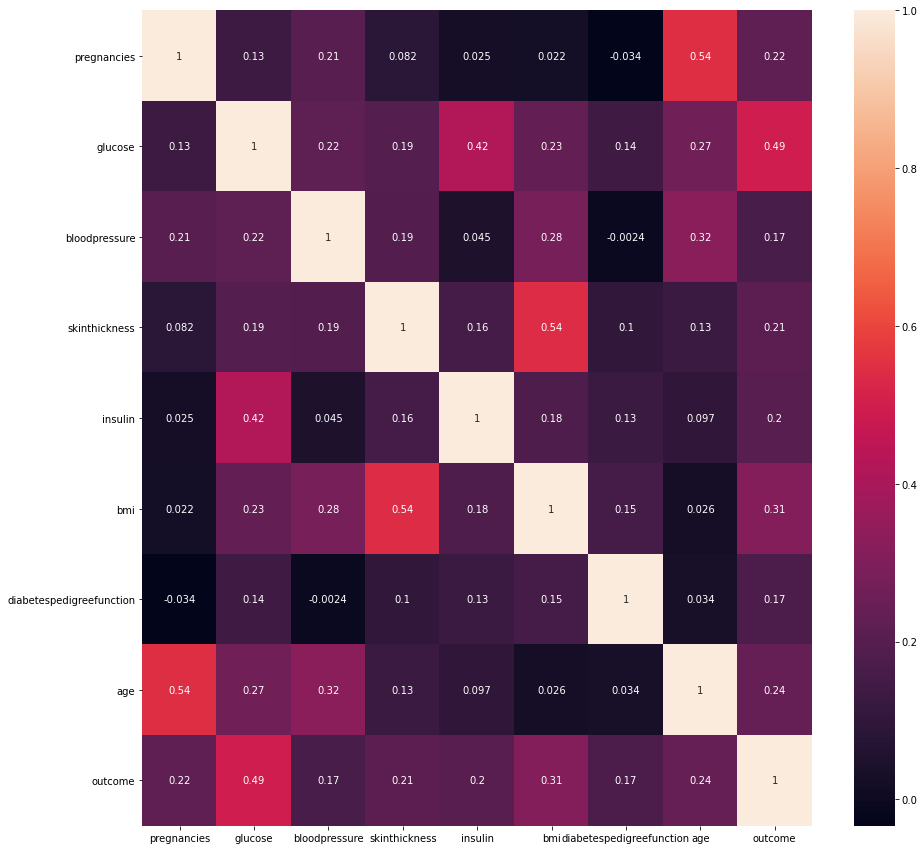

In [21]:
plt.figure(figsize=(15,15))
p = sns.heatmap(db_copy.corr(), annot=True)

In [22]:
#use LabelEncoder() to change boolean ['outcome'] to numeric 0/1 for False/True

In [23]:
labeler = LabelEncoder()
db_copy['outcome']=labeler.fit_transform(db_copy['outcome'])
y= db_copy['outcome']
db_copy


,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [24]:
X = db_copy[['glucose',
  'bloodpressure','skinthickness','insulin','bmi']]
X

,glucose,bloodpressure,skinthickness,insulin,bmi
0,148.0,72.0,35.0,125.0,33.6
1,85.0,66.0,29.0,125.0,26.6
2,183.0,64.0,29.0,125.0,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1
...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9
764,122.0,70.0,27.0,125.0,36.8
765,121.0,72.0,23.0,112.0,26.2
766,126.0,60.0,29.0,125.0,30.1


In [25]:
#perform train/test split before scaling to prevent leakage and then scale

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=10)

In [27]:
sc = StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)


array([[ 1.01759811, -0.04698114,  0.00431783, -0.18621358, -0.18521127],
       [-0.33310947,  1.08370884,  1.44690589,  0.16708884,  0.86157516],
       [ 0.40656373, -1.5007254 ,  0.00431783, -0.19660483, -0.86341092],
       ...,
       [-1.65165734, -0.20850828, -0.21761879, -0.19660483, -0.6717458 ],
       [ 2.07886835, -0.37003542,  1.11400096,  1.6634285 ,  0.75837086],
       [ 1.82159072, -0.04698114,  1.44690589, -0.14464859,  0.02119732]])

In [28]:
#Apply Logistic Regression Model

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_LR = logreg.predict(X_test)

In [31]:
from sklearn import metrics

In [32]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_LR)
cnf_matrix

array([[147,  15],
       [ 44,  48]])

Text(0.5, 257.44, 'Predicted label')

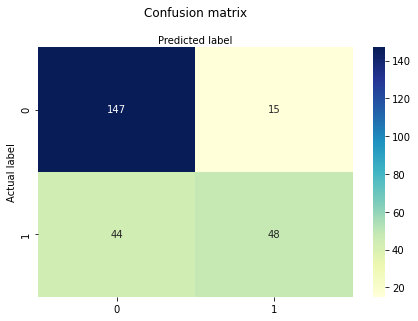

In [33]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [34]:
print("Accuracy:""{:.2f}".format(metrics.accuracy_score(y_test, y_pred_LR)*100, "%"))
print("Precision:""{:.2f}".format(metrics.precision_score(y_test, y_pred_LR)*100, "%"))
print("Recall:""{:.2f}".format(metrics.recall_score(y_test, y_pred_LR)*100, "%"))


Accuracy:76.77
Precision:76.19
Recall:52.17


In [35]:
#Apply Decision Tree Model

In [36]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
y_pred_DT = decisiontree.predict(X_test)



In [37]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_DT)
cnf_matrix

array([[128,  34],
       [ 48,  44]])

Accuracy:67.72
Precision:56.41
Recall:47.83


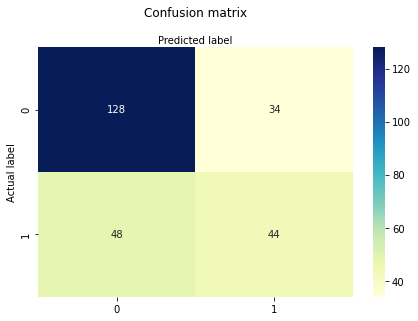

In [38]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy:""{:.2f}".format(metrics.accuracy_score(y_test, y_pred_DT)*100, "%"))
print("Precision:""{:.2f}".format(metrics.precision_score(y_test, y_pred_DT)*100, "%"))
print("Recall:""{:.2f}".format(metrics.recall_score(y_test, y_pred_DT)*100, "%"))

In [39]:
#apply KNN Model

In [40]:
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier(n_neighbors = 5 )  
knn.fit(X_train, y_train)  
y_pred_KNN = knn.predict(X_test)

In [41]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_KNN)
cnf_matrix

array([[135,  27],
       [ 45,  47]])

Text(0.5, 257.44, 'Predicted label')

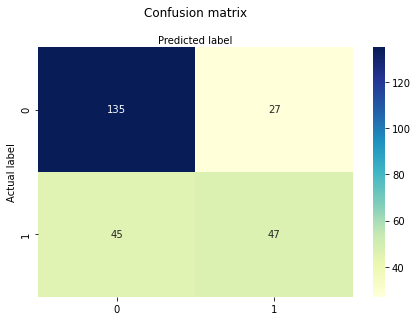

In [42]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [43]:
print("Accuracy:""{:.2f}".format(metrics.accuracy_score(y_test, y_pred_KNN)*100, "%"))
print("Precision:""{:.2f}".format(metrics.precision_score(y_test, y_pred_KNN)*100, "%"))
print("Recall:""{:.2f}".format(metrics.recall_score(y_test, y_pred_KNN)*100, "%"))



Accuracy:71.65
Precision:63.51
Recall:51.09


Text(0.5, 257.44, 'Predicted label')

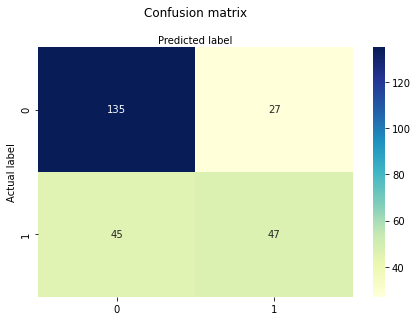

In [44]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [45]:
#use Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfc = RandomForestClassifier() 
rfc.fit(X_train, y_train)  
y_pred_RFC = rfc.predict(X_test)

In [48]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_RFC)
cnf_matrix

array([[143,  19],
       [ 47,  45]])

In [49]:
print("Accuracy:""{:.2f}".format(metrics.accuracy_score(y_test, y_pred_RFC)*100, "%"))
print("Precision:""{:.2f}".format(metrics.precision_score(y_test, y_pred_RFC)*100, "%"))
print("Recall:""{:.2f}".format(metrics.recall_score(y_test, y_pred_RFC)*100, "%"))

Accuracy:74.02
Precision:70.31
Recall:48.91


RandomForestClassifier has the highest accuracy and precision

In [50]:
Range_k = range(1,15)
scores = {}
scores_list = []
for k in Range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(X_train, y_train)
   y_pred_KNN = classifier.predict(X_test)
   scores[k] = metrics.accuracy_score(y_test,y_pred_KNN)
   scores_list.append(metrics.accuracy_score(y_test,y_pred_KNN))
   result = metrics.confusion_matrix(y_test, y_pred_KNN)
   result1 = metrics.classification_report(y_test, y_pred_KNN)
   print(k, "Confusion Matrix:")
   print(result) 
   print(k, "Classification Report:")
   print(result1)
    



1 Confusion Matrix:
[[132  30]
 [ 49  43]]
1 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       162
           1       0.59      0.47      0.52        92

    accuracy                           0.69       254
   macro avg       0.66      0.64      0.65       254
weighted avg       0.68      0.69      0.68       254

2 Confusion Matrix:
[[152  10]
 [ 70  22]]
2 Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.94      0.79       162
           1       0.69      0.24      0.35        92

    accuracy                           0.69       254
   macro avg       0.69      0.59      0.57       254
weighted avg       0.69      0.69      0.63       254

3 Confusion Matrix:
[[131  31]
 [ 45  47]]
3 Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.81      0.78       162
           1       0.60      0.51

Text(0, 0.5, 'Accuracy')

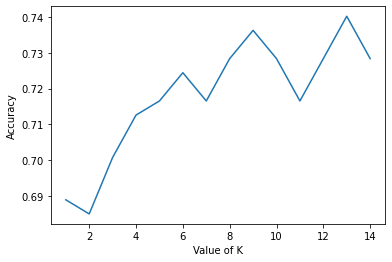

In [51]:
plt.plot(Range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

Accuracy:74.02
Precision:69.70
Recall:50.00


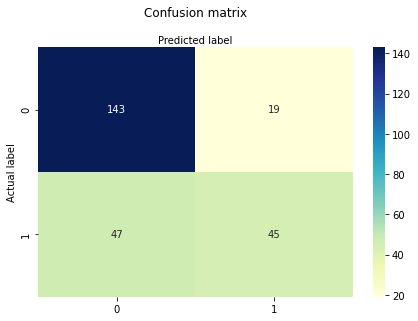

In [52]:
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier(n_neighbors = 13 )  
knn.fit(X_train, y_train)  
y_pred_KNN = knn.predict(X_test)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_KNN)

print("Accuracy:""{:.2f}".format(metrics.accuracy_score(y_test, y_pred_KNN)*100, "%"))
print("Precision:""{:.2f}".format(metrics.precision_score(y_test, y_pred_KNN)*100, "%"))
print("Recall:""{:.2f}".format(metrics.recall_score(y_test, y_pred_KNN)*100, "%"))




In [53]:
"""RandomForestClassifier
#Accuracy:74.02
Precision:70.31
Recall:48.91"""

"""KNN, k = 13
Accuracy:74.02
Precision:69.70
Recall:50.00"""

#The RandomForestClassifier is slightly better at not giving a false negative for diabetes diagnostics. 
#This would be preferred to the KNN due to fewer patients going undiagnosed. 